Topic:        Challenge Set 10

Subject:      Decision Trees

Date:         02/19/2018

Name:         Browning Gentry 

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz
from io import StringIO

# Challenge 1

In [7]:
columns = ['party', 
            'handicapped-infants', 
            'water-project-cost-sharing', 
            'adoption-of-the-budget-resolution',
            'physician-fee-freeze',
            'el-salvador-aid',
            'religious-groups-in-schools',
            'anti-satellite-test-ban',
            'aid-to-nicaraguan-contras',
            'mx-missile',
            'immigration',
            'synfuels-corporation-cutback',
            'education-spending',
            'superfund-right-to-sue',
            'crime',
            'duty-free-exports',
            'export-administration-act-south-africa']
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data",
                header=None,
                names = columns)

In [8]:
df = df.replace('y',1)
df = df.replace('n',0)

total = len(df)

for col in df.columns:
    per_yes = df[col].value_counts()[0]/total
    if per_yes > .5:
        df[col] = df[col].replace('?',1)
    else:
        df[col] = df[col].replace('?',0)

In [10]:
y = df.iloc[:,0]
X = df.iloc[:,1:]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.4,random_state=20)

In [23]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

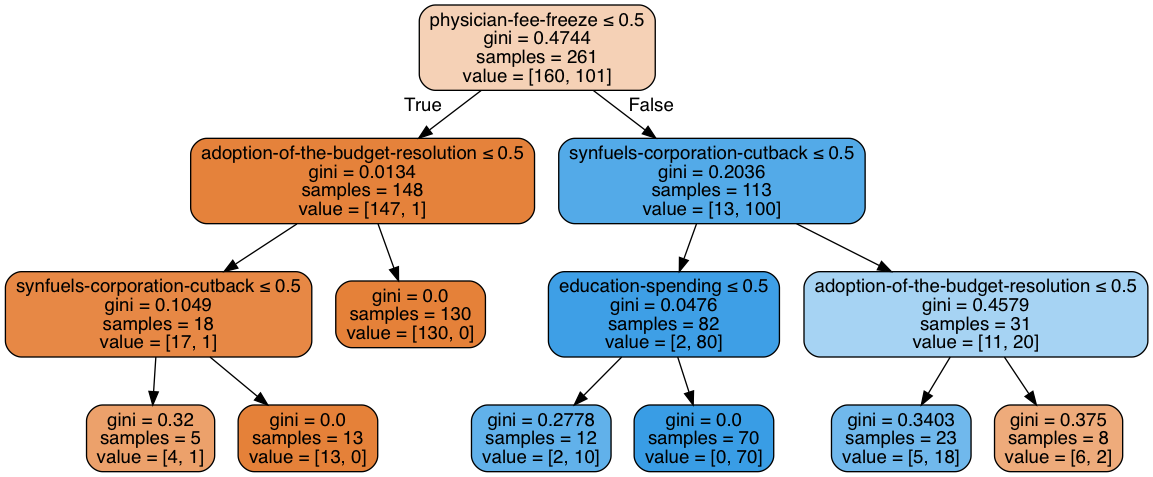

In [24]:
dot_data = StringIO()  
export_graphviz(dt, out_file=dot_data,  
                    feature_names=X_train.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

# Challenge 2

In [29]:
df = pd.read_csv('2013_movies.csv')
del df['Title']
from datetime import datetime
df['ReleaseDate'] = df.apply(lambda x: (datetime.now() 
                                        - datetime.strptime(x['ReleaseDate'],'%Y-%m-%d %H:%M:%S'))
                                         .total_seconds(),
                             axis=1)
df = pd.get_dummies(df, columns = ['Director'], drop_first=True)
df.dropna(inplace=True)

mid = df['Rating']
df.drop(labels=['Rating'], axis=1,inplace = True)
df.insert(0, 'Rating', mid)

In [30]:
y = df.iloc[:,0]
X = df.iloc[:,1:]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .3, random_state = 4444)

In [31]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

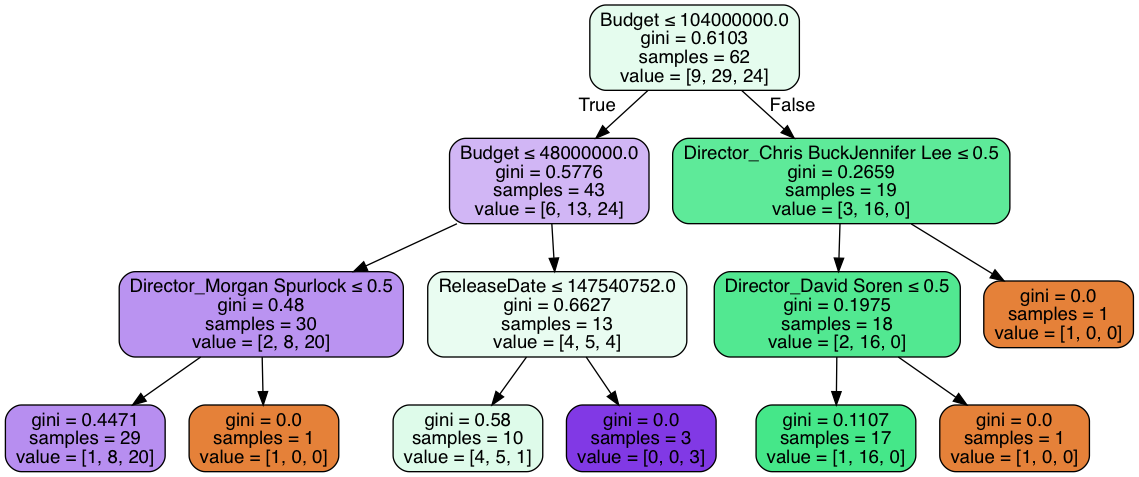

In [32]:
dot_data = StringIO()  
export_graphviz(dt, out_file=dot_data,  
                    feature_names=X_train.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

# Challenge 3

In [33]:
columns = ['Age','Op_Year', 'Pos_Nodes', 'Survival']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data',
                 header=None,
                 names = columns)
mid = df['Survival']
df.drop(labels=['Survival'], axis=1,inplace = True)
df.insert(0, 'Survival', mid)
df['Survival'].replace(1,0, inplace=True)
df['Survival'].replace(2,1, inplace=True)

In [34]:
y = df.iloc[:,0]
X = df.iloc[:,1:]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .3, random_state = 4444)

In [35]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

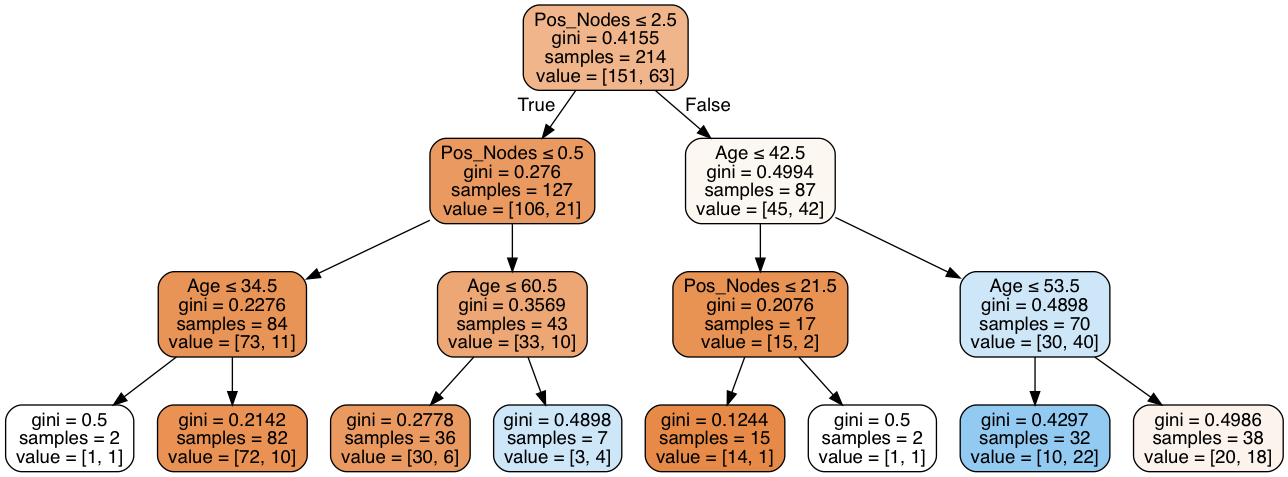

In [36]:
dot_data = StringIO()  
export_graphviz(dt, out_file=dot_data,  
                    feature_names=X_train.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  